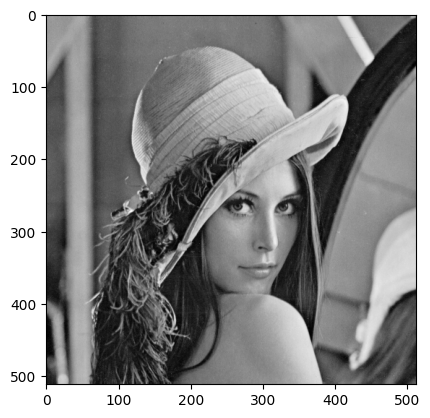

In [1]:
### AUTHOR
# jacopo iacovacci 2019

### LIBRARIES
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread
import networkx as nx


# import image
I = imread("lena512.tiff", as_gray=True)
I = I.astype(float) 
plt.imshow(I,cmap="gray")
plt.show()

In [2]:
# extract horizontal visibility patches (3x3 motifs) 
stride=1

n_rows=I.shape[0]
n_cols=I.shape[1]

motif_size=3
pow2=[1,2,4,8,16,32,64,128]

Freq=np.zeros(256)
count=0;

for i in range(0,n_rows-motif_size+1,stride):
    for j in range(0,n_cols-motif_size+1,stride):
        
        count=count+1   
        string=np.zeros(8)
    
        M=I[i:i+motif_size,j:j+motif_size]
             
        if M[0,0]>M[0,1] and M[0,2]>M[0,1]:
            string[0]=1       
    
        if M[0,2]>M[1,2] and M[2,2]>M[1,2]:
            string[1]=1        
    
        if M[2,0]>M[2,1] and M[2,2]>M[2,1]:
            string[2]=1    
    
        if M[0,0]>M[1,0] and M[2,0]>M[1,0]:
            string[3]=1  

        if M[0,1]>M[1,1] and M[2,1]>M[1,1]:
            string[4]=1  
      
        if M[1,0]>M[1,1] and M[1,2]>M[1,1]:
            string[5]=1  
   
        if M[0,0]>M[1,1] and M[2,2]>M[1,1]:
            string[6]=1  
     
        if M[0,2]>M[1,1] and M[2,0]>M[1,1]:
            string[7]=1

            
        label=np.int16(sum(string*pow2)+1) 
        Freq[label-1]+=1


Freq=Freq/count



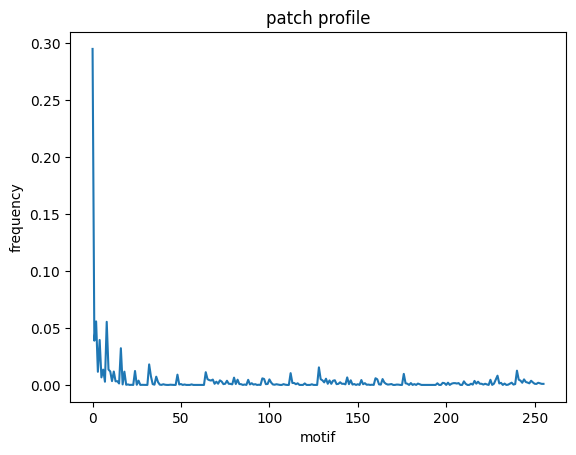

In [3]:
# plot motif frequency
plt.plot(Freq)  
plt.title("patch profile")
plt.xlabel("motif")
plt.ylabel("frequency")
plt.show() 

In [4]:
# save frequency of patches in output file
with open('patch_seq_ihvg_notebook.txt','a') as f:                #the file containing patches frequency
        for element in Freq:
            f.write("%s\n" % element)